<a href="https://www.kaggle.com/code/mdaniyaltariq/employee-monitoring-final?scriptVersionId=219222117" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!nvidia-smi

Sat Jan 25 15:48:01 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8             11W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:


import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [3]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.67 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6096.0/8062.4 GB disk)


In [6]:
!pip install roboflow
!pip install pyresearch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.10.0 requires tensorflow==2.17.0, but you have tensorflow 2.17.1 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 53.3 MB/s eta 0:00:00:00:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 22.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.

In [7]:


from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

## Inference with Pre-trained COCO Model

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [8]:
# from ultralytics import YOLO
# model = YOLO(f'/content/datasets/employee-surveillance-6/yolov8s.pt')
# results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)
# print(results)

In [8]:
%cd /kaggle/working

from roboflow import Roboflow
rf = Roboflow(api_key="3Pb5dthKLLkTxTwEegmv")
project = rf.workspace("employee-surveillance-ss4zo").project("employee-surveillance-opnuy")
version = project.version(6)
dataset = version.download("yolov11")











/kaggle/working
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to employee-surveillance-6 in yolov11:: 100%|██████████| 20314/20314 [00:02<00:00, 8109.29it/s]


In [9]:
import yaml

# New data to write into the YAML file
new_data = {
    'train': '/kaggle/working/employee-surveillance-6/train/images',
    'val': '/kaggle/working/employee-surveillance-6/valid/images',
    'test': '/kaggle/working/employee-surveillance-6/test/images',
    'nc': 11,
    'names': [
        'bayarea', 'cabin', 'cabin area', 'chair', 'employee', 'employee not working',
        'employee working', 'employees', 'employees discussing', 'empty chair', 'monitoring-of-employees'
    ],
    'roboflow': {
        'workspace': 'employee-surveillance-ss4zo',
        'project': 'employee-surveillance-opnuy',
        'version': 6,
        'license': 'CC BY 4.0',
        'url': 'https://universe.roboflow.com/employee-surveillance-ss4zo/employee-surveillance-opnuy/dataset/6'
    }
}

# Path to the existing YAML file
file_path = '/kaggle/working/employee-surveillance-6/data.yaml'

# Write the new data into the YAML file, replacing the old contents
with open(file_path, 'w') as file:
    yaml.dump(new_data, file, default_flow_style=False)

# Verify the file is saved
print(f"YAML file has been successfully replaced at: {file_path}")


YAML file has been successfully replaced at: /kaggle/working/employee-surveillance-6/data.yaml


## Custom Training

In [10]:
%cd /kaggle/working/employee-surveillance-6
!yolo task=detect mode=train model=yolo11x.pt data=data.yaml epochs=15 imgsz=600 plots=True

/kaggle/working/employee-surveillance-6
100%|█████████████████████████████████████████| 109M/109M [00:00<00:00, 276MB/s]
Ultralytics 8.3.67 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11x.pt, data=data.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=600, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fram

In [11]:
!ls /kaggle/working/employee-surveillance-6/runs/detect/train

args.yaml					  train_batch1.jpg
confusion_matrix_normalized.png			  train_batch2.jpg
confusion_matrix.png				  train_batch3110.jpg
events.out.tfevents.1737820248.6e9bc9867a9c.72.0  train_batch3111.jpg
F1_curve.png					  train_batch3112.jpg
labels_correlogram.jpg				  val_batch0_labels.jpg
labels.jpg					  val_batch0_pred.jpg
P_curve.png					  val_batch1_labels.jpg
PR_curve.png					  val_batch1_pred.jpg
R_curve.png					  val_batch2_labels.jpg
results.csv					  val_batch2_pred.jpg
results.png					  weights
train_batch0.jpg


/content


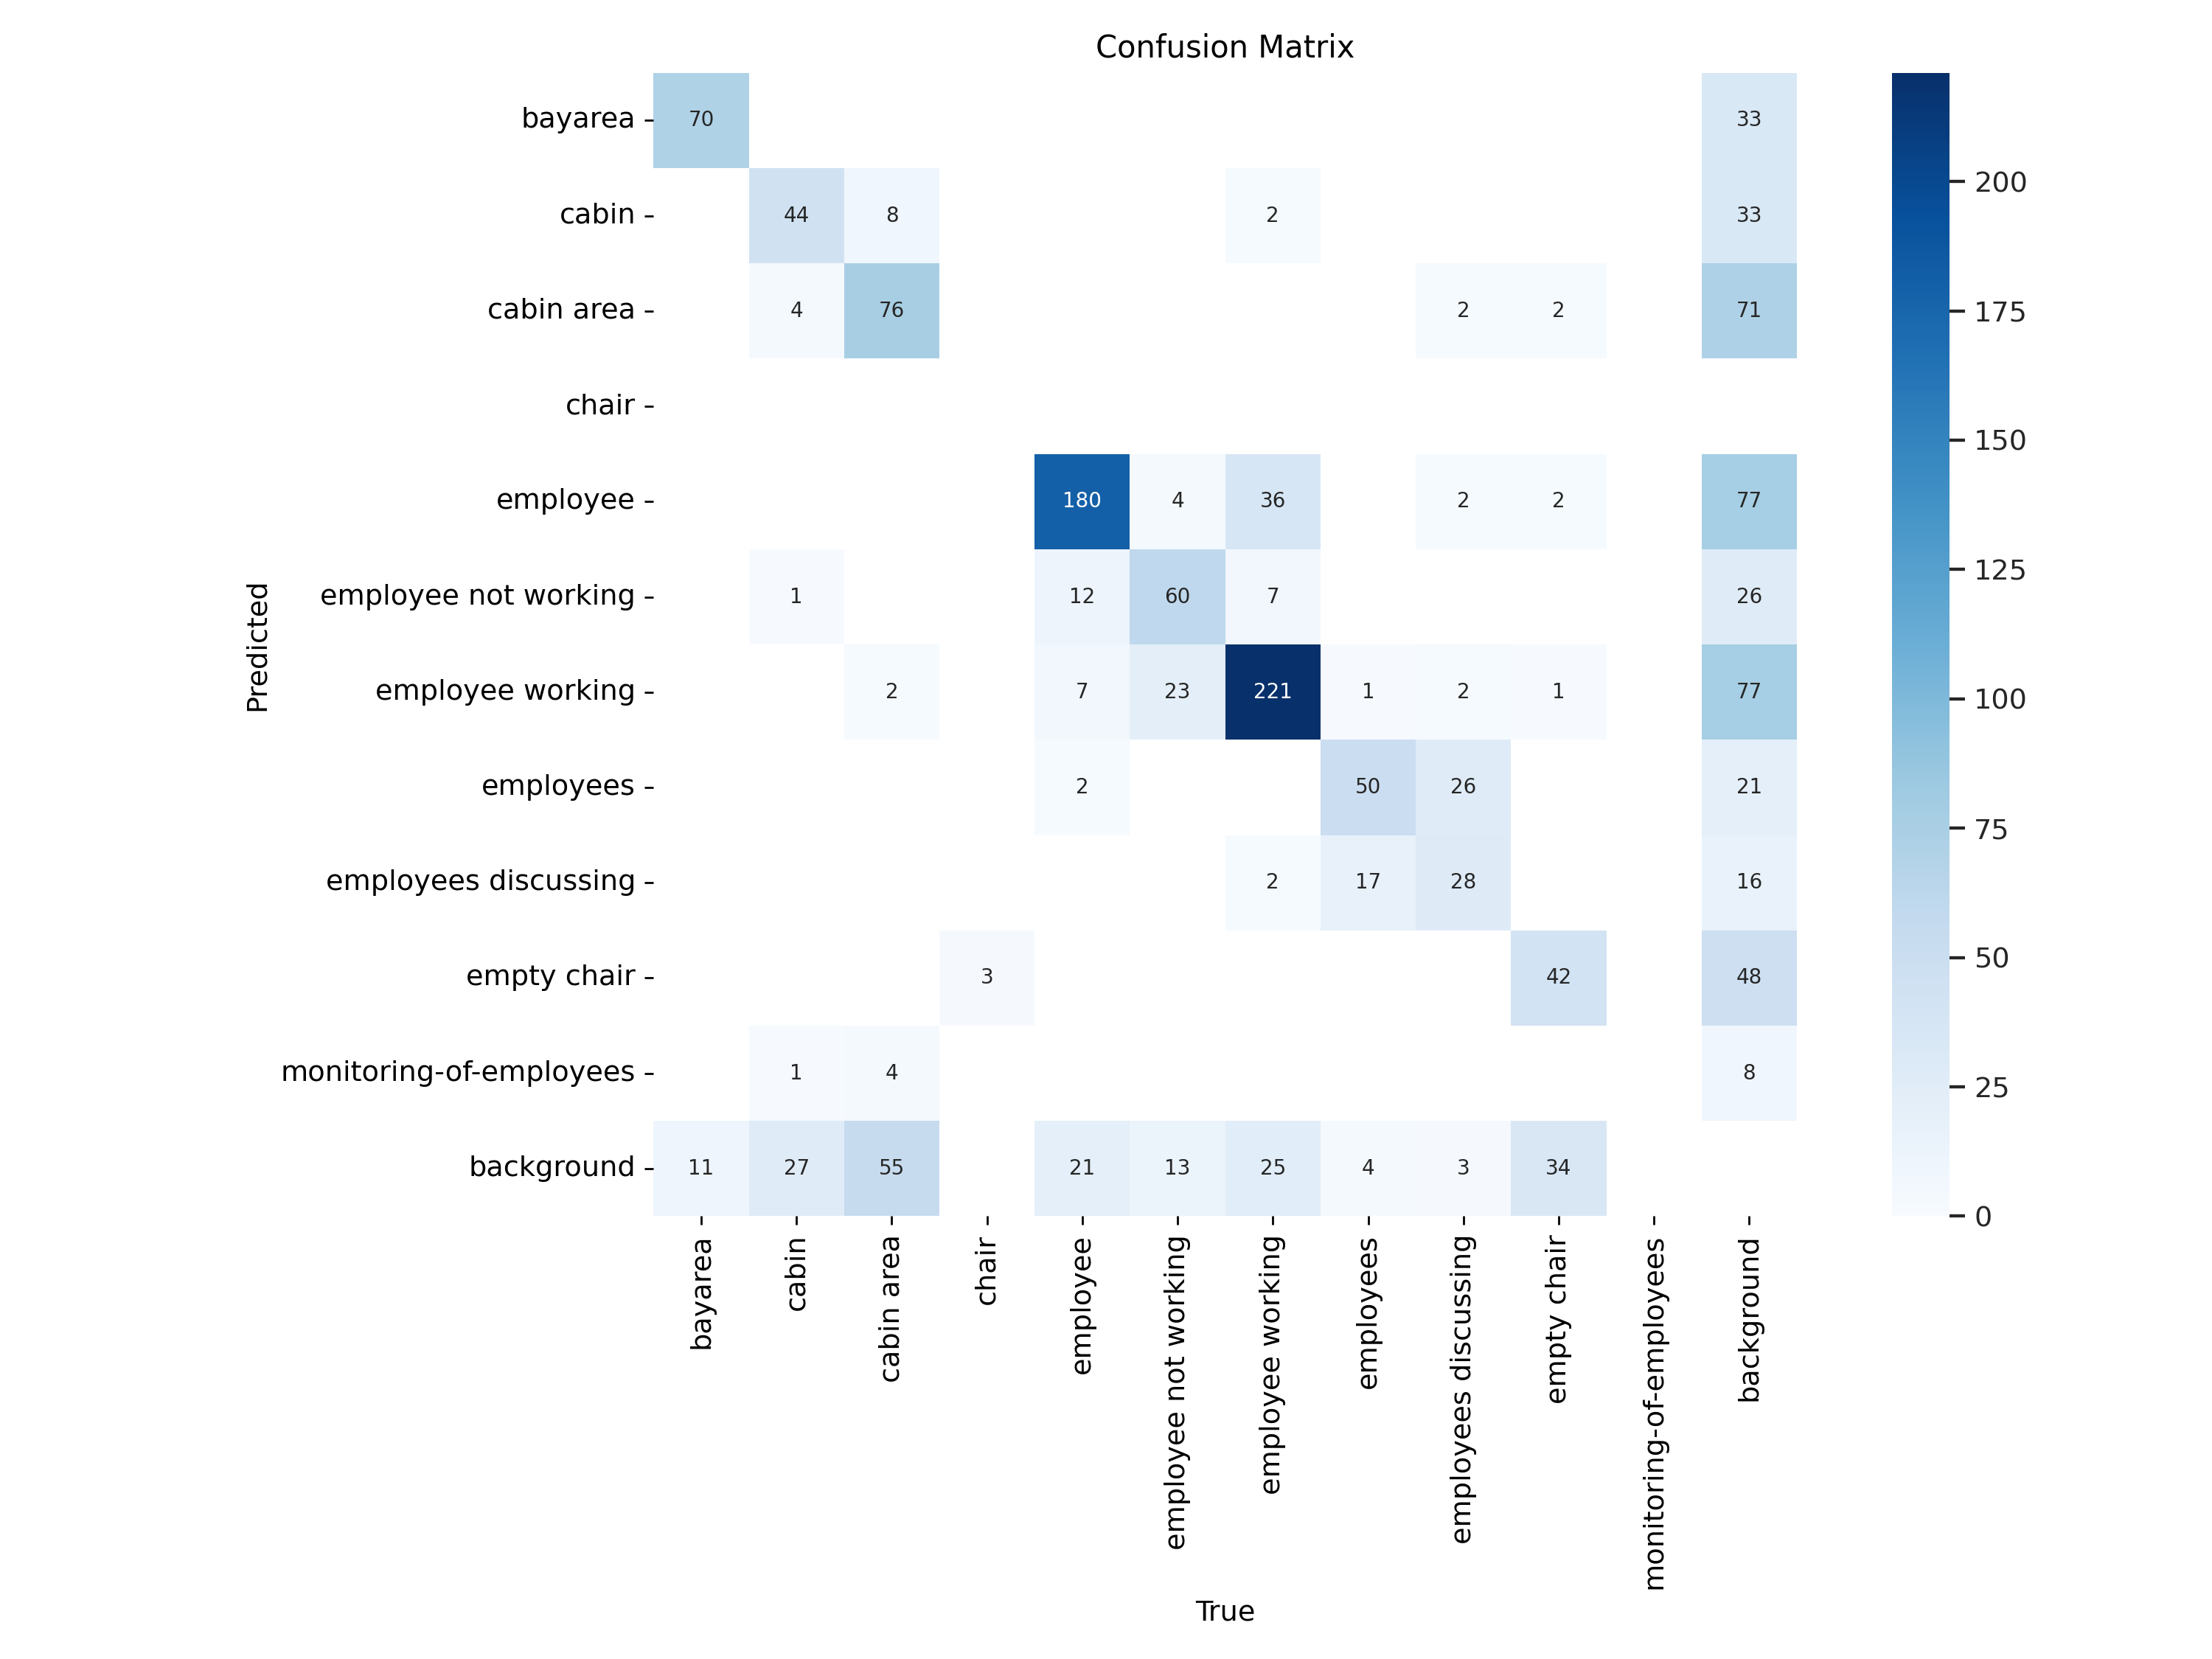

In [12]:
from IPython import get_ipython
from IPython.display import display, Image

get_ipython().run_line_magic('cd', '/content')
Image(filename=f'/kaggle/working/employee-surveillance-6/runs/detect/train/confusion_matrix.png', width=600)

/kaggle/working


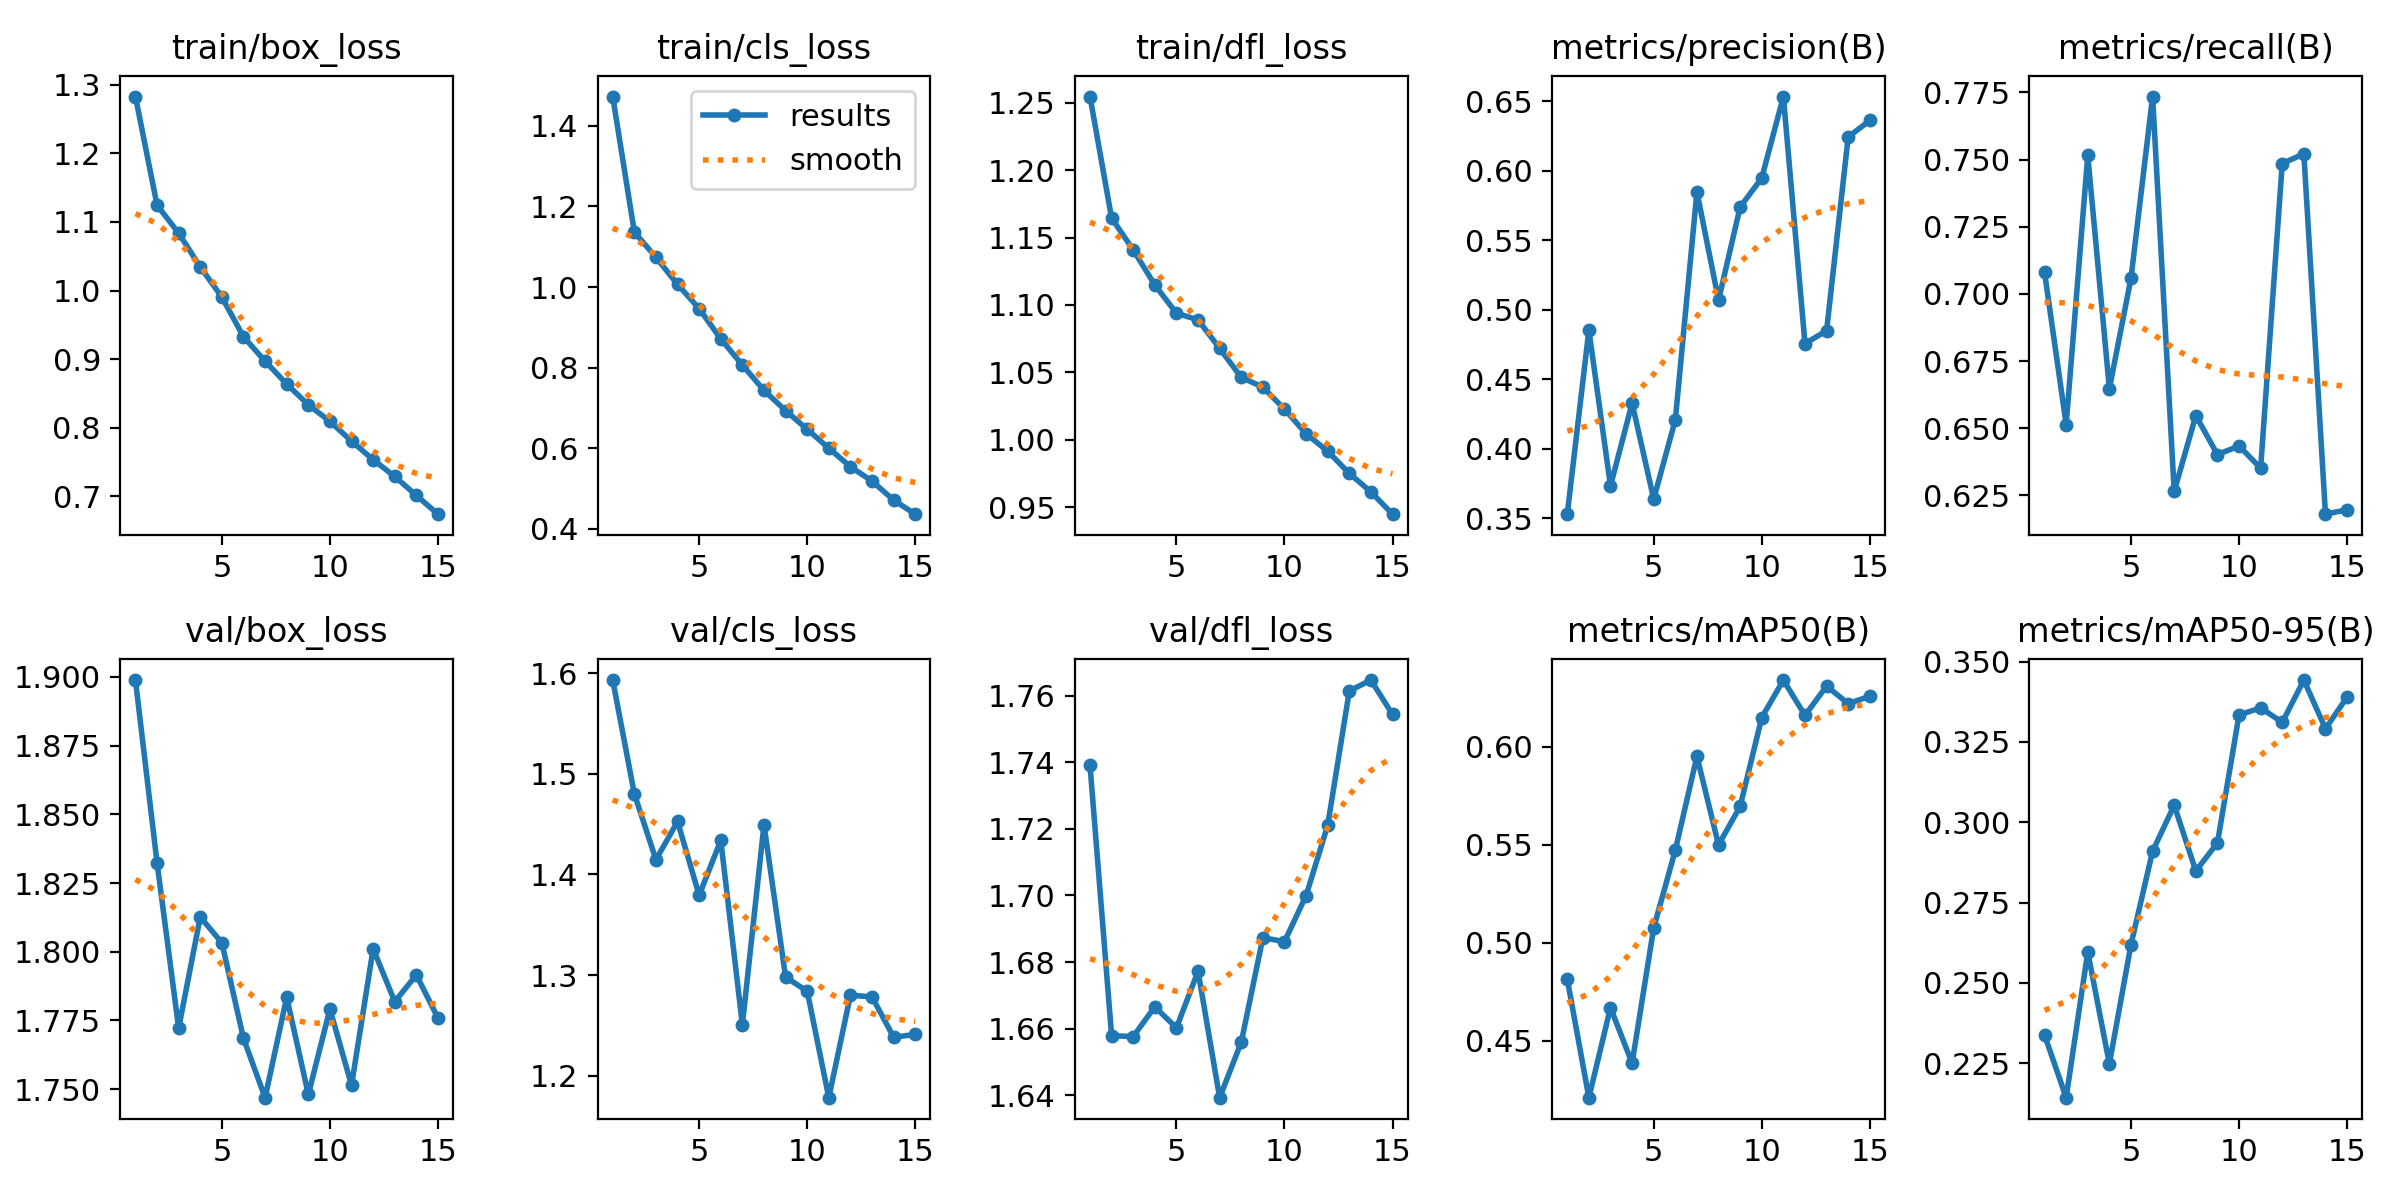

In [13]:
%cd {HOME}
Image(filename=f'/kaggle/working/employee-surveillance-6/runs/detect/train/results.png', width=600)

/content


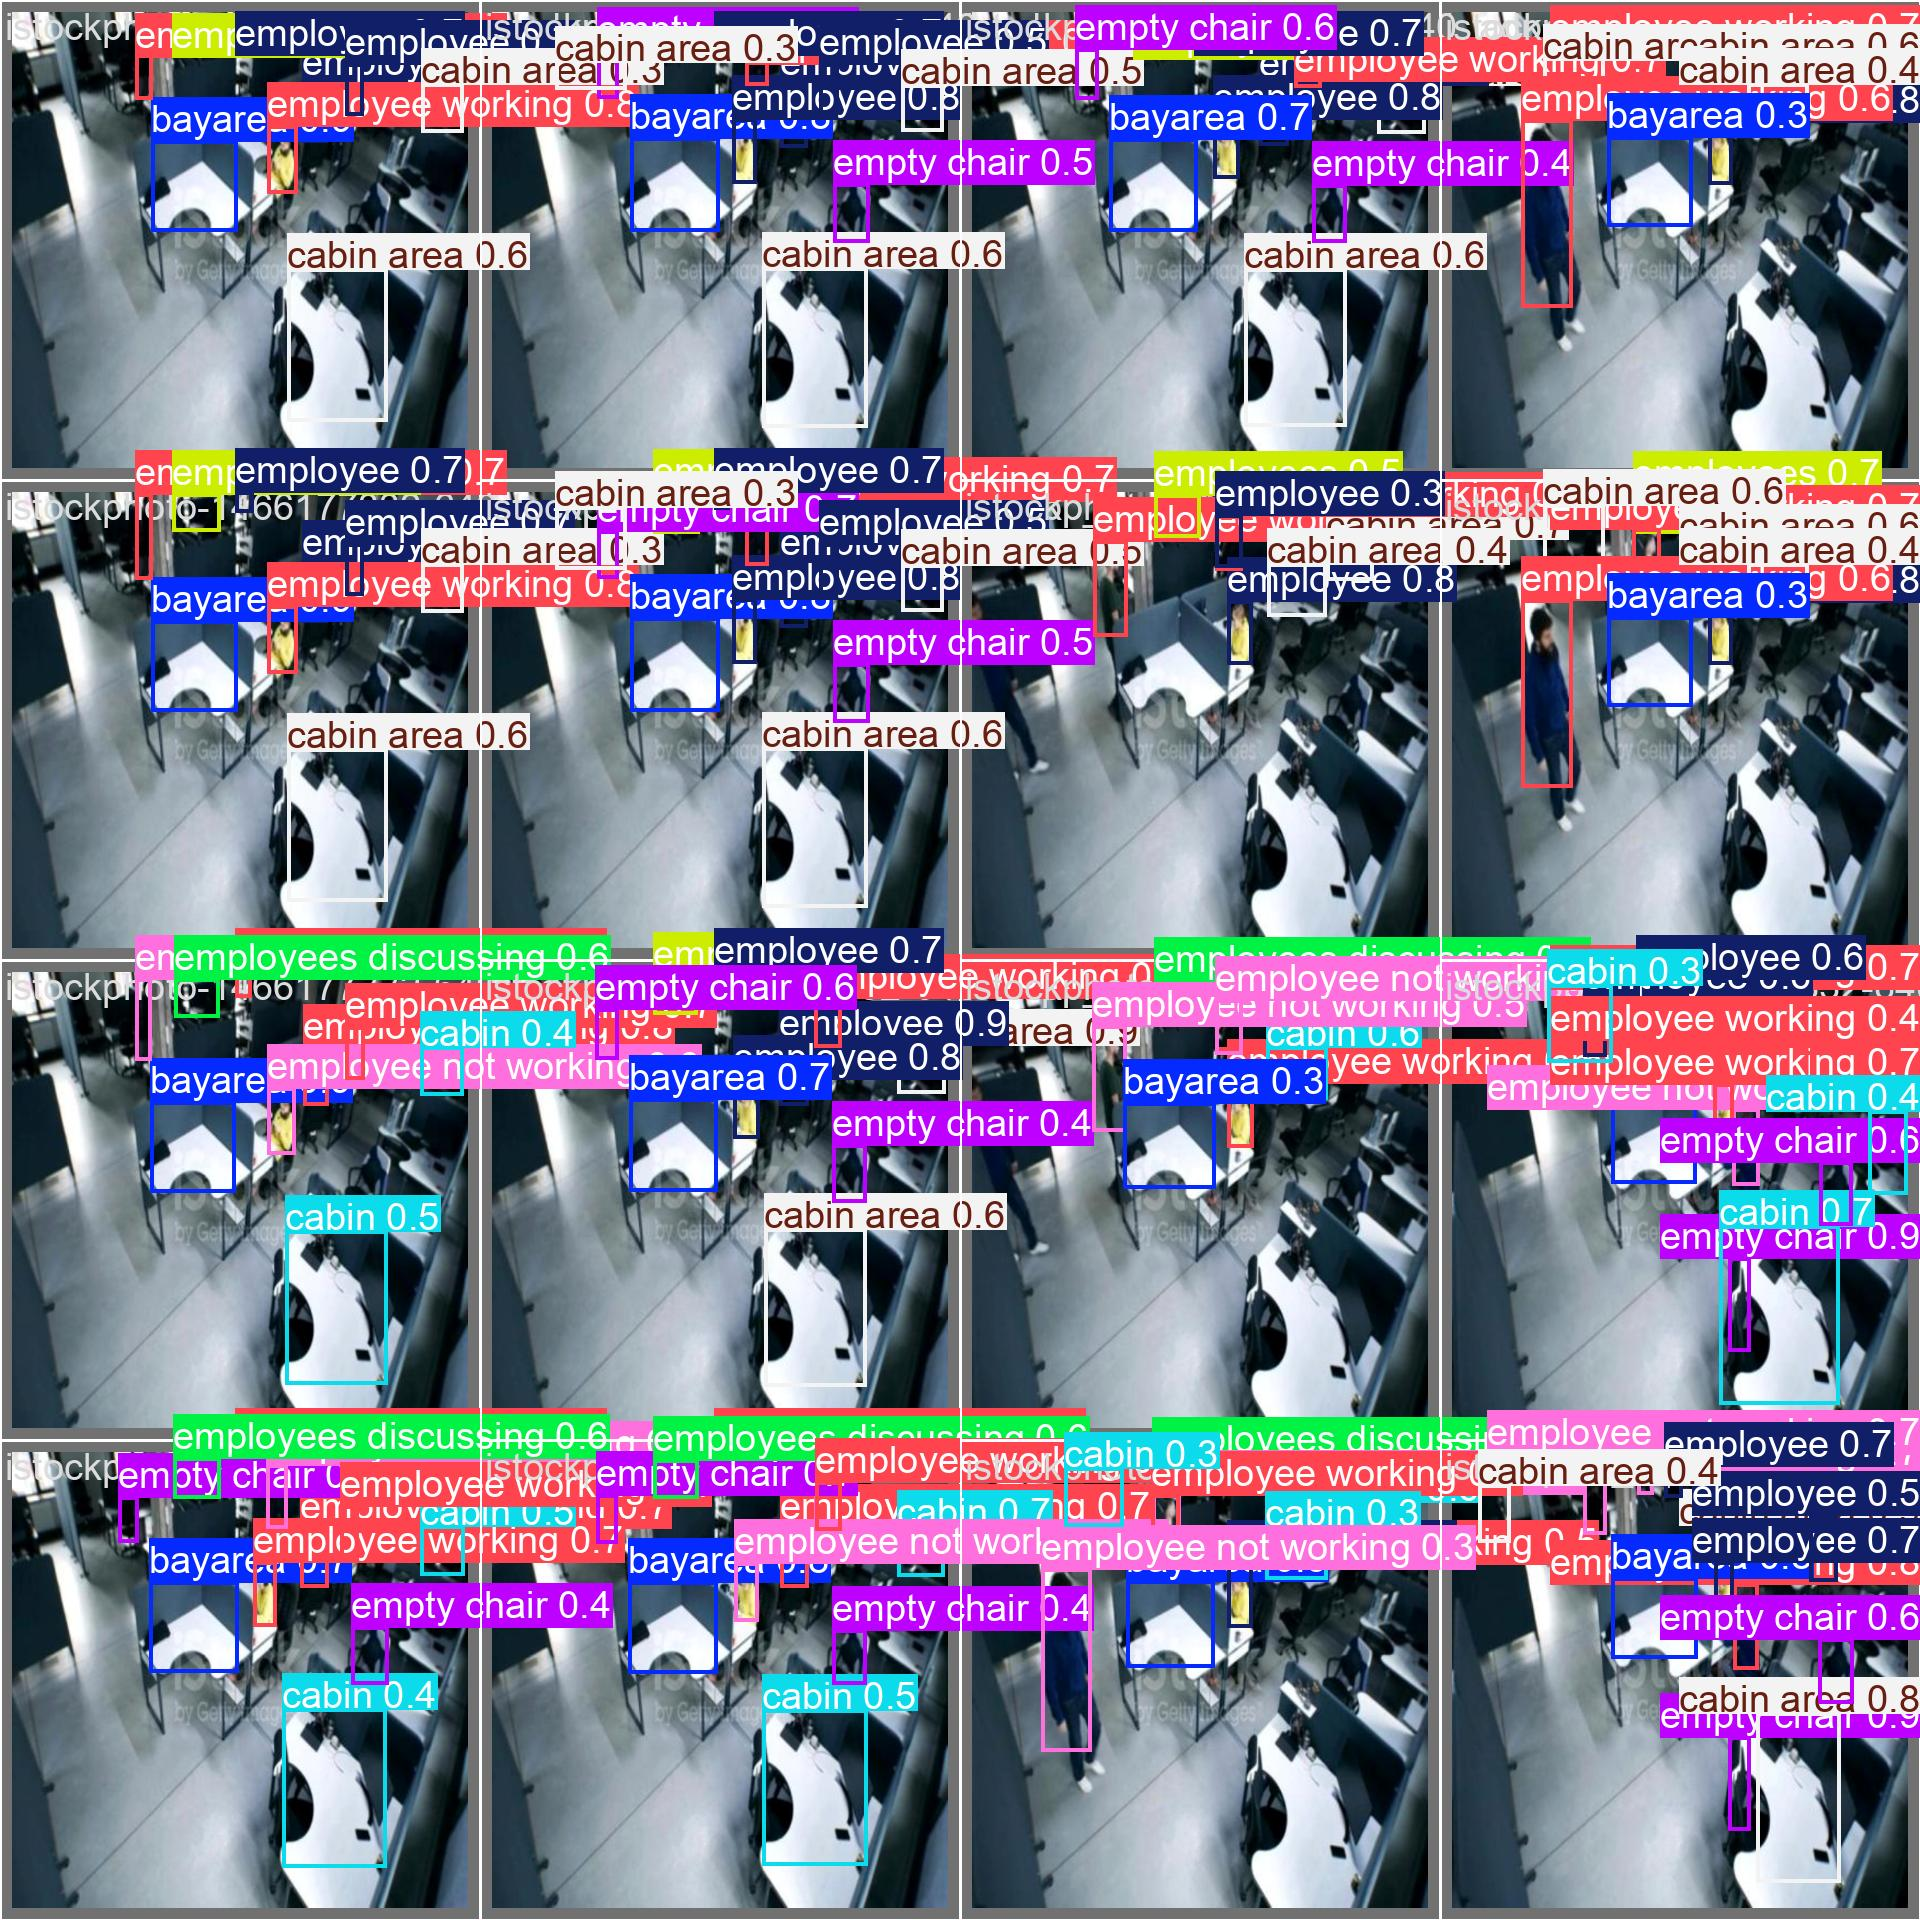

In [14]:
%cd /content
Image(filename=f'/kaggle/working/employee-surveillance-6/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [15]:
%cd /content

!yolo task=detect mode=val model=/kaggle/working/employee-surveillance-6/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics 8.3.67 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLO11x summary (fused): 464 layers, 56,839,729 parameters, 0 gradients, 194.5 GFLOPs
val: Scanning /kaggle/working/employee-surveillance-6/valid/labels.cache... 135 
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        135       1137      0.486      0.754      0.631      0.343
               bayarea         81         81      0.636      0.975      0.795      0.504
                 cabin         43         77      0.337      0.714      0.479       0.23
            cabin area         80        145      0.366      0.759      0.524      0.248
                 chair          3          3      0.483      0.333      0.665      0.532
              employee         87        222      0.519      0.887      0.786      0.329
  employee not working         47        100       0.54       0.73      0.566       0.25
      employee working        124     

## Inference with Custom Model

In [16]:
%cd /content
!yolo task=detect mode=predict model=/kaggle/working/employee-surveillance-6/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics 8.3.67 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLO11x summary (fused): 464 layers, 56,839,729 parameters, 0 gradients, 194.5 GFLOPs

image 1/72 /kaggle/working/employee-surveillance-6/test/images/istockphoto-1466177332-640_adpp_is_mp4-0_jpg.rf.1349a781afca6b2812f95f9bae1ef0f4.jpg: 608x608 1 bayarea, 3 cabin areas, 3 employees, 3 employee not workings, 1 employee working, 2 empty chairs, 72.1ms
image 2/72 /kaggle/working/employee-surveillance-6/test/images/istockphoto-1466177332-640_adpp_is_mp4-0_jpg.rf.aed7fcfc61f1472cc6cfa56ad3fe85a9.jpg: 608x608 1 bayarea, 5 cabins, 3 employees, 1 employee not working, 4 employee workings, 2 empty chairs, 67.9ms
image 3/72 /kaggle/working/employee-surveillance-6/test/images/istockphoto-1466177332-640_adpp_is_mp4-0_jpg.rf.fd970984c2ba95b7bd70401c7edd13af.jpg: 608x608 1 bayarea, 3 cabin areas, 3 employees, 3 employee not workings, 1 employee working, 2 empty chairs, 62.6ms
image 4/72 /kaggle/working/employee

**NOTE:** Let's take a look at few results.

In [17]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/kaggle/working/employee-surveillance-6/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"/content/datasets/employee-surveillance-6/runs/detect/train2/")